In [1]:
import sys
import warnings
warnings.filterwarnings("ignore")
from scipy.special import gamma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("plot_style.mplstyle")
from tqdm import tqdm

sys.path.append("../src/")
from fLe import fle
import utils as ut
import fBm_stats as fbs

In [2]:
DATA_PATH = "../data/fle/"
H = 0.6
realizations = 20000
T = 10
h = 0.005

In [19]:
def plot_results(H, T, h, realizations, axi, xlabel = False, ylabel = True):
    msd_num = ut.read_hdf5_data(DATA_PATH + f"msd-h-{H}-{realizations}.hdf5")
    
    eq = fle(H)
    eq.params(T, h)
    eq.make_B_H()
    eq.get_msd_analytical()
    eq.get_msd_analytical_limit()
    
    axi.plot(eq.t, np.array(msd_num.msd)/max(msd_num.msd), ls="", marker = "^", label = "Numerical")
    axi.plot(eq.t, np.array(eq.msd_analytical)/max(eq.msd_analytical), ls = "-", label = "Analytical")
    if ylabel:
        axi.set_ylabel(r"$msd(t)$")
    if xlabel:
        axi.set_xlabel(r"$t$")
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
    axi.text(0.80, 0.15, f"H = {H}", transform=axi.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

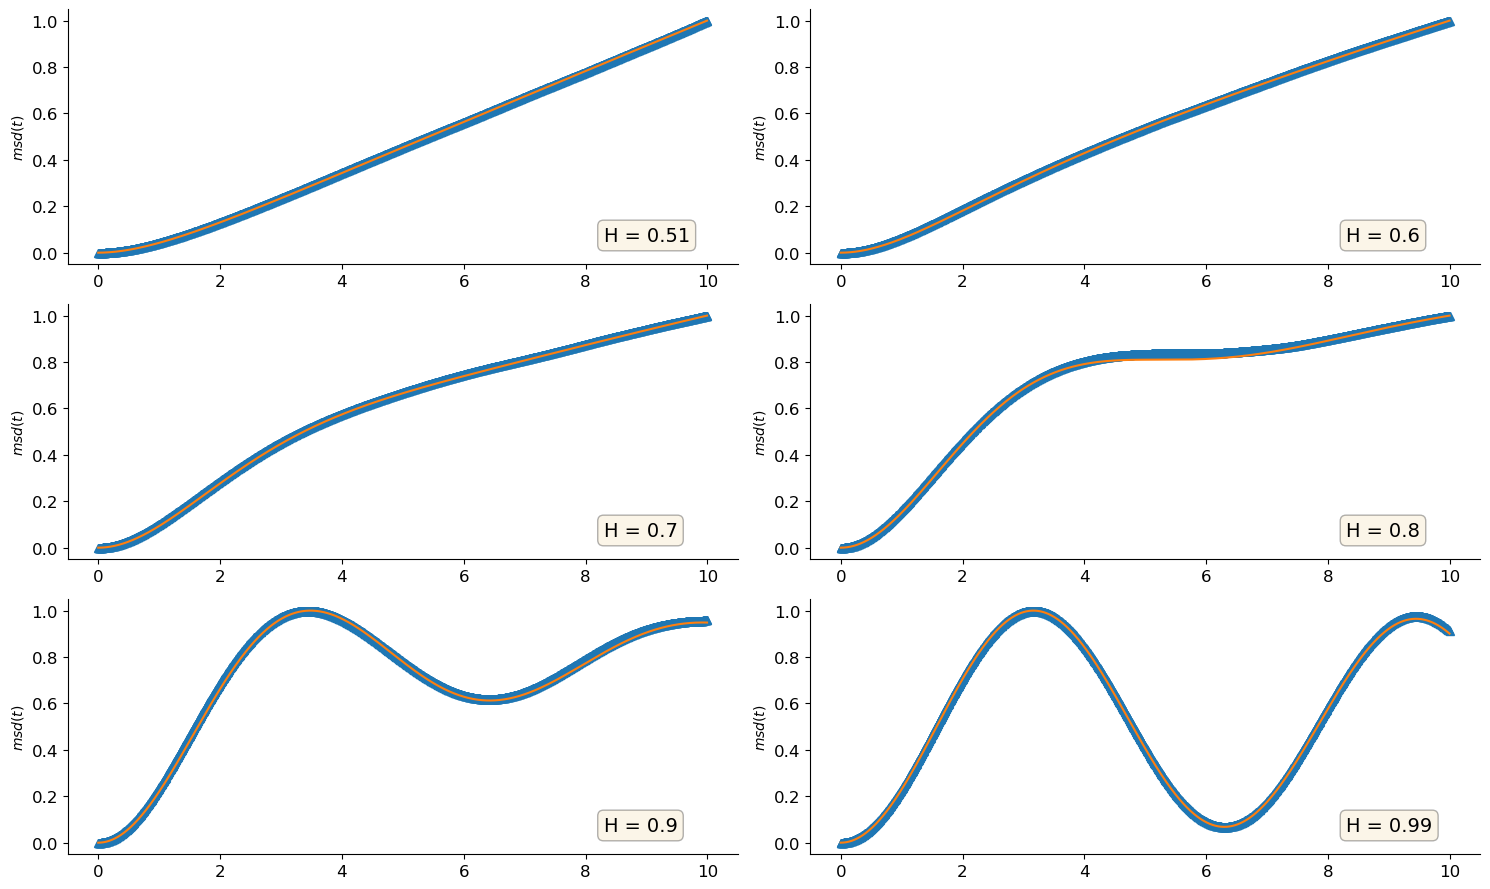

In [23]:
fig, ax = plt.subplots(3, 2, figsize = (15,9))
plot_results(0.51, T, h, realizations, ax[0][0])
plot_results(0.6, T, h, realizations, ax[0][1])
plot_results(0.7, T, h, realizations, ax[1][0])
plot_results(0.8, T, h, realizations, ax[1][1])
plot_results(0.9, T, h, realizations, ax[2][0])
plot_results(0.99, T, h, realizations, ax[2][1])

In [32]:
def msd(H, T, zeta = 1, realizations = 100, h = 0.1):
    for r in tqdm(range(realizations)):
        eq = fle(H)
        eq.params(T, h, zeta = zeta)
        eq.make_B_H()
        eq.solve()        
        if r == 0:
            df_msd = pd.DataFrame({"t": eq.t})
        df_msd["x_"+str(r)] = eq.numerical        
    df_msd.set_index("t", inplace = True)
    
    return fbs.msd(df_msd, False)

In [39]:
def plot_msd(ax, H, T, realizations = 1000, h = 0.01):
    eq = fle(H)
    eq.params(T, h)
    eq.make_B_H()
    eq.get_analytical()
    eq.get_msd_analytical()
    eq.get_msd_analytical_limit()    
    
    zeta = np.sqrt(3 - 2*H)    
    msd_num1 = msd(H, T, zeta, realizations, h)
    zeta = np.sqrt((2*H-1)/(H*(2*H-1)))
    msd_num2 = msd(H, T, zeta, realizations, h)
    
    ax.plot(eq.t, msd_num1, label = r"Num. $\zeta = \sqrt{3-2H}$")
    ax.plot(eq.t, msd_num2, label = r"Num. $\zeta = \sqrt{1/H}$")
    ax.plot(eq.t, eq.msd_analytical, ls = "--", label = "Anl.")
    ax.plot(eq.t, eq.msd_analytical_limit, ls = ":", label = "Anl. lim")
    ax.set_xlabel("t")
    ax.set_ylabel("MSD")
   
    ax.set_title("H = " + str(H))
    

In [41]:
T = 10
h = 0.01

100%|██████████| 1000/1000 [06:39<00:00,  2.50it/s]


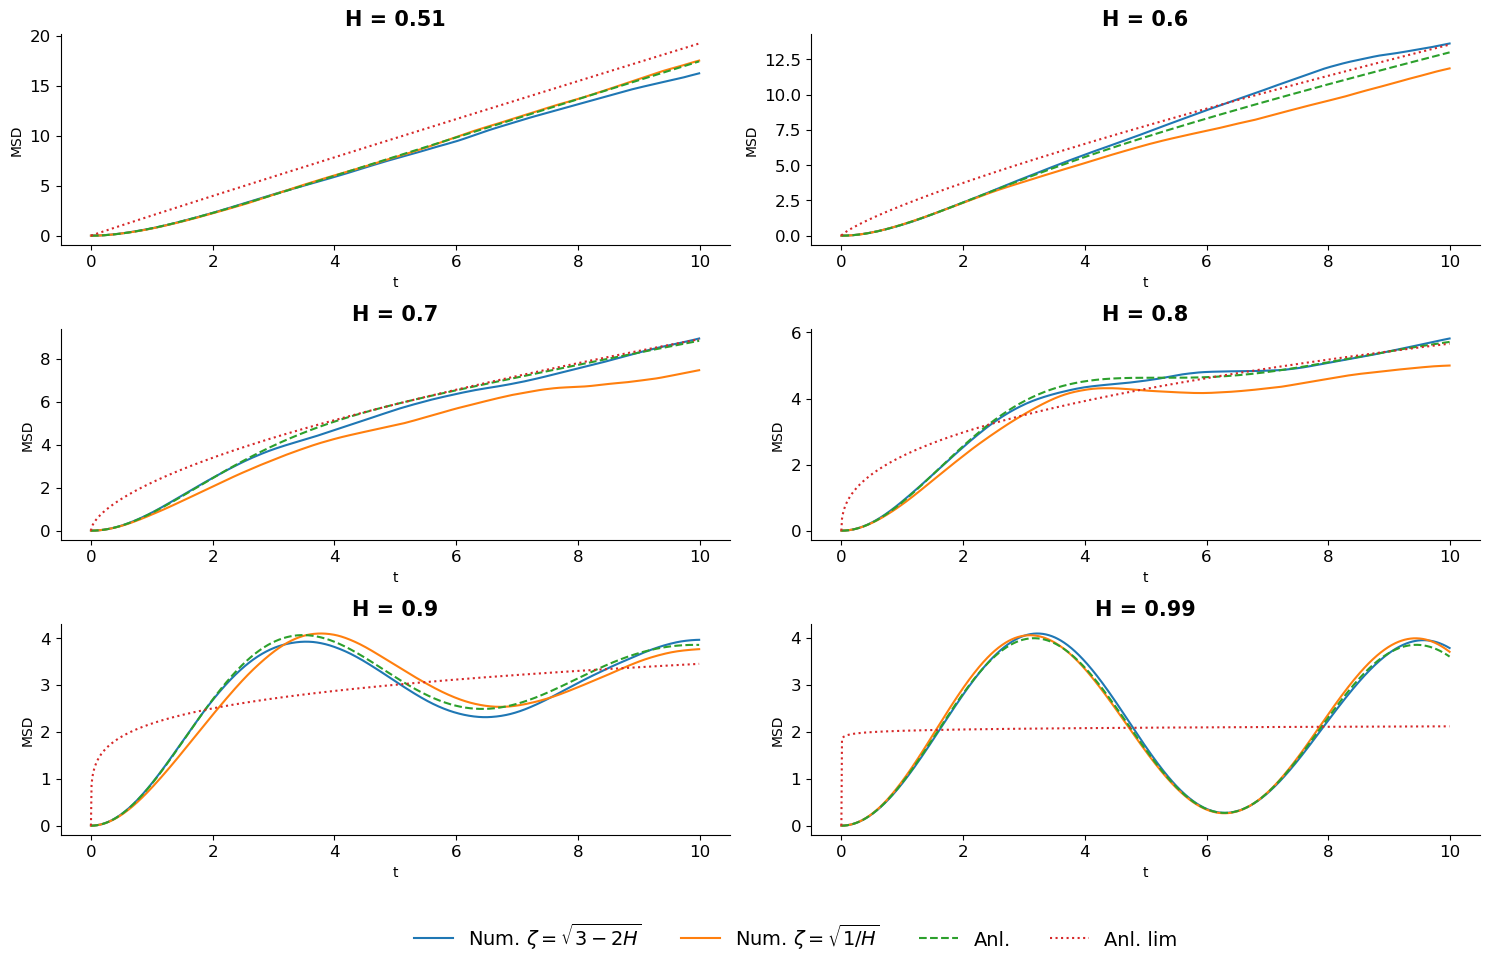

In [42]:
fig, ax = plt.subplots(3, 2, figsize=(15,9))


plot_msd(ax[0][0], 0.51, T)
plot_msd(ax[0][1], 0.6, T)
plot_msd(ax[1][0], 0.7, T)
plot_msd(ax[1][1], 0.8, T)
plot_msd(ax[2][0], 0.9, T)
plot_msd(ax[2][1], 0.99, T)

handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor = (0.8, -0.01), ncol = 5);
    

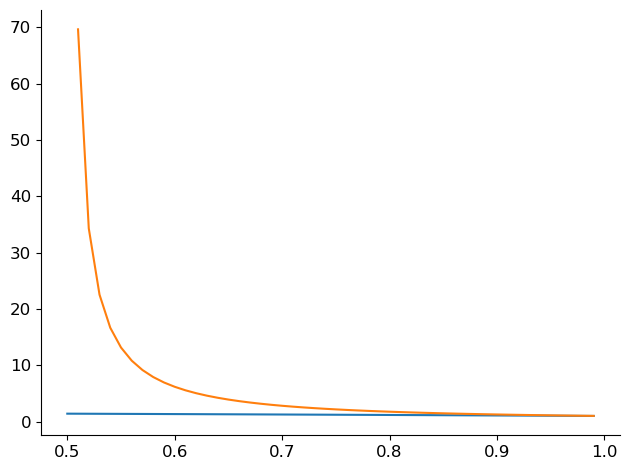

In [43]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.special import gamma
H = np.arange(0.5, 1, 0.01)fea
zeta = np.sqrt(3-2*H)
zeta1 = np.sqrt(gamma(2*H-1)/(H*(2*H-1)))
plt.plot(H, zeta)
plt.plot(H, zeta1)